In [1]:
# Are we able to see any patterns between co2 emissions and summer temperature over a period of 13 years? 2000-2013
#Growing up I remember the summer months of june were always the hottest, and fall weather was always cooler. Over the past several years I've noticed we've been experiencing more indian summers. Can we find data that shows this?Can we see an effect with c02 emissions? 

#create dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as numpy
from scipy.stats import linregress

#import csv files
co2_csv="..\Resources\CO_level_2000.csv"
temp_csv="..\Resources\GlobalLandTemperaturesByState.csv"
global_emissions = "..\Resources\GlobalEmissions1751_2014.csv"
global_temp = "..\Resources\GlobalLandTemperaturesByCountry.csv"



co2_data = pd.read_csv(co2_csv)
temp_data = pd.read_csv(temp_csv)
Global_df = pd.read_csv(global_emissions) 
global_temp = pd.read_csv(global_temp)

#turn csv into a dataframe
temp_df = pd.DataFrame(temp_data)
co2_data= pd.DataFrame(co2_data)
global_temp_df = pd.DataFrame(global_temp)

#remove null values
temp_df = temp_df.dropna(how="any")
co2_data = co2_data.dropna(how="any")

#verify successful import and conversion
# print(temp_df.head())
# print(co2_data.head())

global_temp.loc[global_temp["Country"]=="United States"]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
554880,1768-09-01,15.420,2.880,United States
554881,1768-10-01,8.162,3.386,United States
554882,1768-11-01,1.591,3.783,United States
554883,1768-12-01,-2.882,4.979,United States
554884,1769-01-01,-3.952,4.856,United States
554885,1769-02-01,-2.684,3.311,United States
554886,1769-03-01,1.828,3.884,United States
554887,1769-04-01,8.843,3.482,United States
554888,1769-05-01,15.724,4.795,United States
554889,1769-06-01,20.933,2.613,United States


In [2]:
#Figure out what we're working with. Only print first city and see how many years of data there are.

print(temp_df.loc[(temp_df['State']=="California")])
#Extracting year and month from the data(data1) 
temp_df['Year'] = temp_df['dt'].str[:4]
temp_df['Month'] = temp_df['dt'].str[6:7]
temp_df.head()

               dt  AverageTemperature  AverageTemperatureUncertainty  \
71058  1849-01-01               5.591                          2.405   
71059  1849-02-01               6.941                          2.041   
71060  1849-03-01               9.731                          2.294   
71061  1849-04-01              12.294                          2.861   
71062  1849-05-01              14.417                          2.215   
71063  1849-06-01              21.091                          2.635   
71064  1849-07-01              25.556                          3.960   
71065  1849-08-01              24.992                          3.828   
71066  1849-09-01              20.499                          1.880   
71067  1849-10-01              14.725                          2.134   
71068  1849-11-01               8.506                          1.953   
71069  1849-12-01               3.898                          1.772   
71070  1850-01-01               4.261                          2

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
0,1855-05-01,25.544,1.171,Acre,Brazil,1855,5
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,6
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,7
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,8
4,1855-09-01,25.675,1.014,Acre,Brazil,1855,9


In [3]:
print("Looking at the data above we can see that this data has state temp data starting from 1849 to 2013")

Looking at the data above we can see that this data has state temp data starting from 1849 to 2013


In [4]:
#Begin Datacleaning



In [5]:
Global_df.head()

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
0,"(Note: missing values denoted by ""."")",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Source: Tom Boden and Bob Andres (Oak Ridge Na...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,DOI: 10.3334/CDIAC/00001_V2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFGHANISTAN,1949.0,4.0,4,0,0,0.0,.,.,0.0
4,AFGHANISTAN,1950.0,23.0,6,18,0,0.0,0,0,0.0


In [6]:
#filter the tempstate data by country. Filter to U.S.

# us_states_df = temp_df.loc[temp_df["Country"] == "United States"]
# print(us_states_df.head())

#use this for code below


In [7]:
#create a for loop to iterate over the years

#extracting june july august data from  data1 and name the file (june_july_august_data)
june_july_august_data=temp_df[(temp_df['Month'] >= "6") & (temp_df['Month'] <= "8")]
june_july_august_data.head()




# start_year = 1849
# end_year = 2013


# # #to input the incremental years from 1849 to 2013,created a for loop  
# # Summer month is June so using the string 6 on date
# for year in range(start_year, end_year + 1): 
#     temp_df.loc[temp_df['dt'].str.contains(str(year)+ "-06"), 'Year'] = str(year)
#    # temp_df.loc[temp_df['dt'].str.contains(str(year)), 'Year'] = str(year)
    


,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country,Year,Month
1,1855-06-01,24.228,1.103,Acre,Brazil,1855,6
2,1855-07-01,24.371,1.044,Acre,Brazil,1855,7
3,1855-08-01,25.427,1.073,Acre,Brazil,1855,8
13,1856-06-01,24.930,1.355,Acre,Brazil,1856,6
15,1856-08-01,24.615,1.053,Acre,Brazil,1856,8


In [8]:
june_july_august_data = june_july_august_data.dropna(how="any")

In [9]:
us_states_df = june_july_august_data.loc[temp_df["Country"] == "United States"]
us_states_df = us_states_df.reset_index()

In [10]:
us_states_df = us_states_df[["AverageTemperature","State","Year"]]
us_states_df.head()

,AverageTemperature,State,Year
0,25.290,Alabama,1744
1,26.420,Alabama,1744
2,24.568,Alabama,1750
3,28.464,Alabama,1750
4,27.126,Alabama,1750


In [11]:
#Choose the state you want to look up, divide the 3 months to get an average "summer temp for the year"
#Also converting Celcius into Farenheit at this time. 
#This will be done for California, New York and Illinois to get the 3 different areas of the U.S. West Coast, Central and East Coast.


#California
california_df = us_states_df.loc[us_states_df["State"]=="California"]
california_df_group = california_df.groupby(["Year"]).sum()
california_df_group["AverageTemperature"] = round((california_df_group["AverageTemperature"]*1.8+32)/3,2)
california_df_group = california_df_group.reset_index()

#New York
ny_df = us_states_df.loc[us_states_df["State"]=="New York"]
ny_df_group = ny_df.groupby(["Year"]).sum()
ny_df_group["AverageTemperature"] = round((ny_df_group["AverageTemperature"]*1.8+32)/3,2)
ny_df_group = ny_df_group.reset_index()

#Illinois
ill_df = us_states_df.loc[us_states_df["State"]=="Illinois"]
ill_df_group = ill_df.groupby(["Year"]).sum()
ill_df_group["AverageTemperature"] = round((ill_df_group["AverageTemperature"]*1.8+32)/3,2)
ill_df_group = ill_df_group.reset_index()

#print head to just ensure appropriate values show
california_df_group.head()

,Year,AverageTemperature
0,1849,53.65
1,1850,51.75
2,1851,52.12
3,1852,52.40
4,1853,52.20


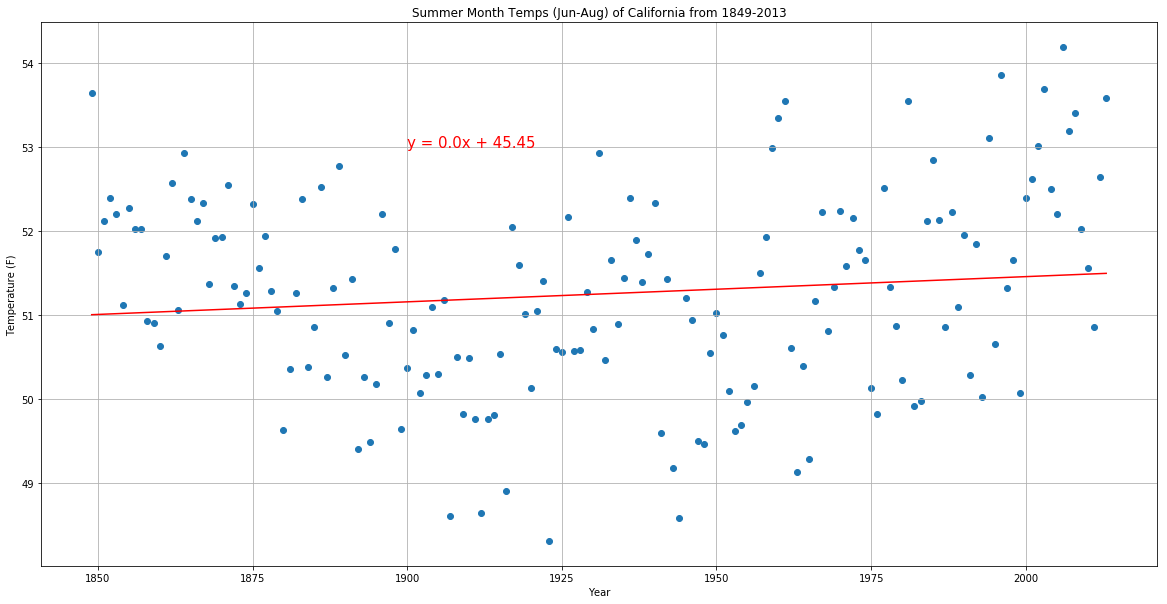

In [12]:
# California temp plot for 1849-2013

fig= plt.figure(figsize=(20,10))

x_values= california_df_group["Year"].astype("int64")
y_values= california_df_group["AverageTemperature"]

plt.title("Summer Month Temps (Jun-Aug) of California from 1849-2013")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.scatter(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(1900,53),fontsize=15,color="red")
plt.grid(True)


In [13]:
# Slope is either 0 or a really small positive number

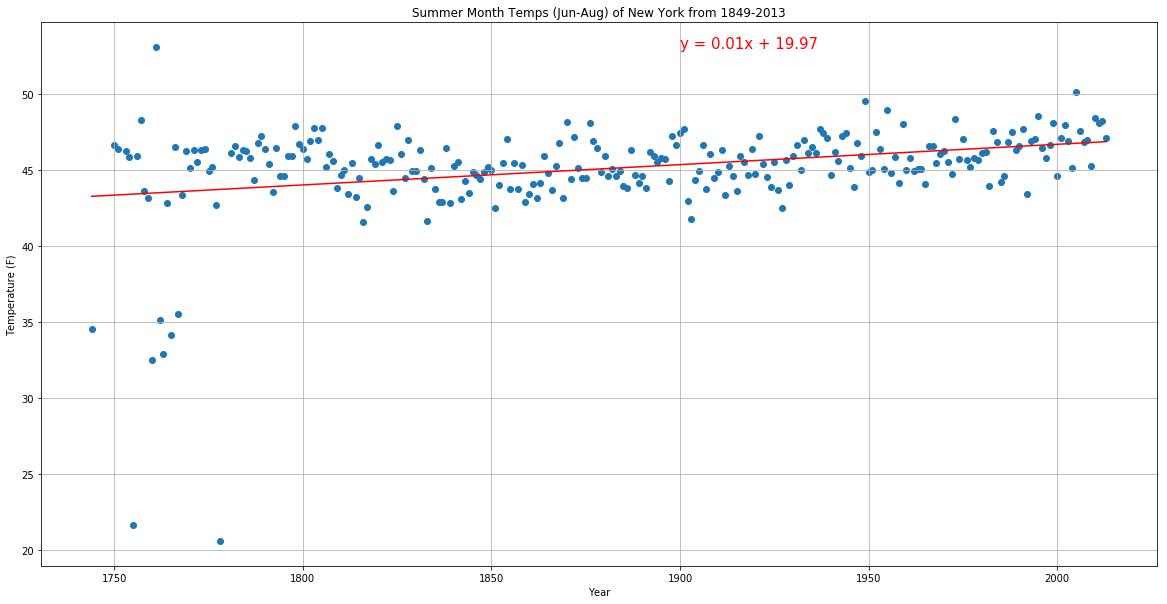

In [14]:
# New York temp plot for 1750-2013

fig= plt.figure(figsize=(20,10))

x_values= ny_df_group["Year"].astype("int64")
y_values= ny_df_group["AverageTemperature"]

plt.title("Summer Month Temps (Jun-Aug) of New York from 1849-2013")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.scatter(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(1900,53),fontsize=15,color="red")
plt.grid(True)

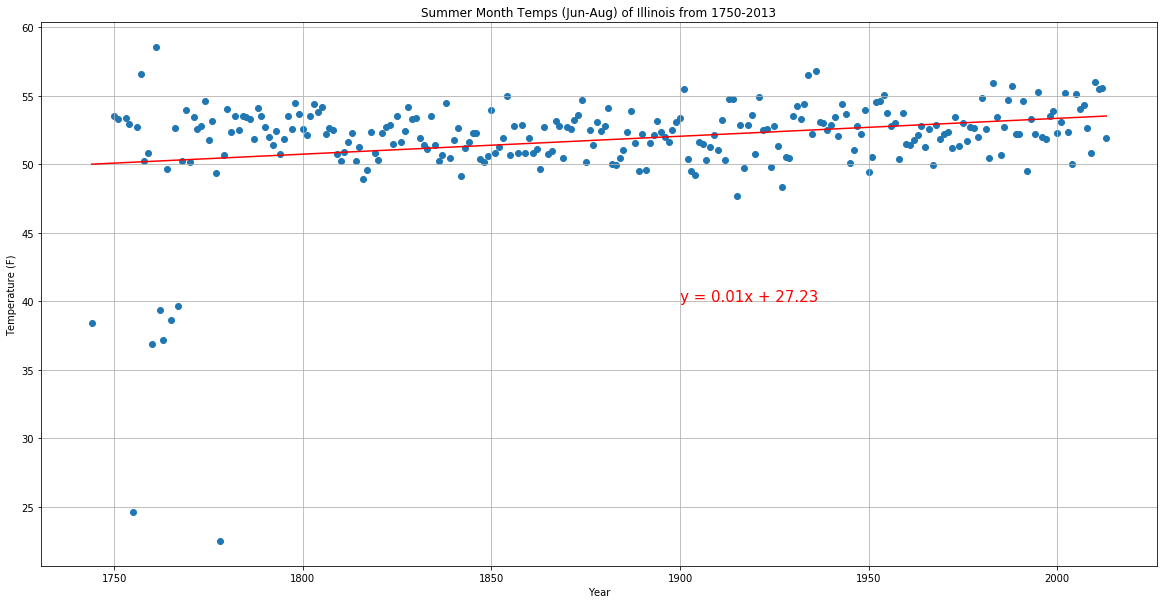

In [15]:
# Illinois Summer temp plot for 1750-2013

fig= plt.figure(figsize=(20,10))

x_values= ill_df_group["Year"].astype("int64")
y_values= ill_df_group["AverageTemperature"]

plt.title("Summer Month Temps (Jun-Aug) of Illinois from 1750-2013")
plt.xlabel("Year")
plt.ylabel("Temperature (F)")
plt.scatter(x_values, y_values)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(1900,40),fontsize=15,color="red")
plt.grid(True)

In [16]:
#Now need to clean cO2 data more in order to merge together
co2_data.columns

Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date', 'Arithmetic Mean',
       'Units of Measure', '1st Max Value', '1st Max Hour', 'AQI'],
      dtype='object')

In [17]:
co2_data = co2_data[["State","City","Date","Arithmetic Mean","Units of Measure"]]

In [18]:
start_year = 1990
end_year = 2013

# #to input the incremental years from 1849 to 2013,created a for loop  
for year in range(start_year, end_year + 1): 
    co2_data.loc[co2_data['Date'].str.contains(str(year)), 'Year'] = str(year)

co2_data.head()

,State,City,Date,Arithmetic Mean,Units of Measure,Year
366,Alabama,Birmingham,2000-01-01,0.994737,Parts per million,2000
367,Alabama,Birmingham,2000-01-02,0.891667,Parts per million,2000
368,Alabama,Birmingham,2000-01-03,0.700000,Parts per million,2000
369,Alabama,Birmingham,2000-01-04,1.120833,Parts per million,2000
370,Alabama,Birmingham,2000-01-05,1.095833,Parts per million,2000


In [19]:
#group cities by state and year  and find the mean c02 emission of each year
## GRouping all cities together per state and giving that an average
#Major assumption but it's a starting point


co2_group = co2_data.groupby(["State","Year"], as_index=False)
co2_group_mean = co2_group.mean()
co2_group_mean.head()

,State,Year,Arithmetic Mean
0,Alabama,2000,0.980286
1,Alabama,2001,1.200558
2,Alabama,2002,0.689120
3,Alabama,2003,0.413722
4,Alabama,2004,0.532250


co2_group_mean.merge(us_states_df,on=["State","Year"])

In [20]:
#Merge data based on common years.
#only should take calfornia years bc data is based on california. Same will be done for other States.

ca_co2_temp = co2_group_mean.merge(california_df_group,on=["Year"])
ca_co2_temp = ca_co2_temp.rename(columns={"Arithmetic Mean":"C02 emmision (ppm)"})

#For New York
ny_co2_temp = co2_group_mean.merge(ny_df_group,on=["Year"])
ny_co2_temp = ny_co2_temp.rename(columns={"Arithmetic Mean":"C02 emmision (ppm)"})

#For Illinois
ill_co2_temp = co2_group_mean.merge(ill_df_group,on=["Year"])
ill_co2_temp = ill_co2_temp.rename(columns={"Arithmetic Mean":"C02 emmision (ppm)"})
ill_co2_temp.head()


,State,Year,C02 emmision (ppm),AverageTemperature
0,Alabama,2000,0.980286,52.3
1,Alaska,2000,1.429225,52.3
2,Arizona,2000,0.998278,52.3
3,Arkansas,2000,1.182333,52.3
4,California,2000,0.671920,52.3


In [21]:
#Data frame isn't specific to the cities chosen so need to filter out the desired cities and assign them to vaiables.

cali = ca_co2_temp.loc[ca_co2_temp["State"]=="California"]
ny = ny_co2_temp.loc[ny_co2_temp["State"]=="New York"]
ill = ill_co2_temp.loc[ill_co2_temp["State"]=="Illinois"]

#Verify that dataframe works
# cali.head()
# ny.head()
ill.head()

,State,Year,C02 emmision (ppm),AverageTemperature
14,Illinois,2000,0.770553,52.30
63,Illinois,2001,0.798464,53.08
114,Illinois,2002,0.777003,55.21
165,Illinois,2003,0.679866,52.31
216,Illinois,2004,0.683080,50.03


In [22]:
# print(ill["AverageTemperature"])
# print(ny["AverageTemperature"])

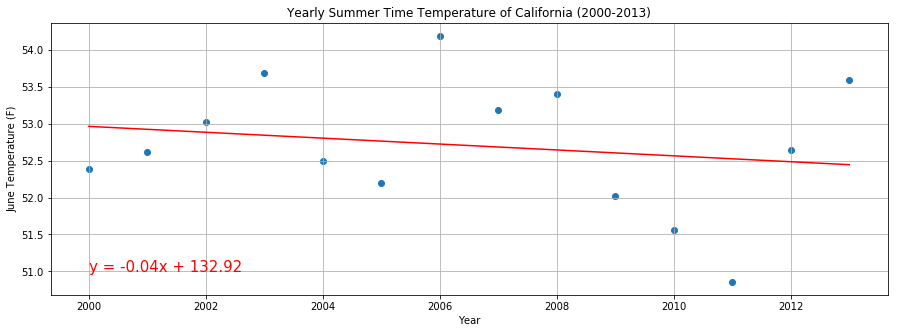

In [23]:
fig= plt.figure(figsize=(15,5))

# (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
# regress_values = cali["Year"] * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

x_values = cali["Year"].astype('int64')
y_values = cali["AverageTemperature"]


plt.xlabel("Year")
plt.ylabel("June Temperature (F)")
plt.title("Yearly Summer Time Temperature of California (2000-2013)")
plt.scatter(x_values,y_values)
#plt.subplot(1,2,2)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(2000,51),fontsize=15,color="red")
plt.grid(True)

# Save the figure
plt.savefig("output_data/cali_temp.png")


# plt.plot(cali["Year"],regress_values,"r-")
# plt.annotate(line_eq,(6,10),fontsize=15,color="red")


In [24]:
#looks like the temp is going on a downward trend, is this signifying that temperature is changing? Can test by looking at a different month.

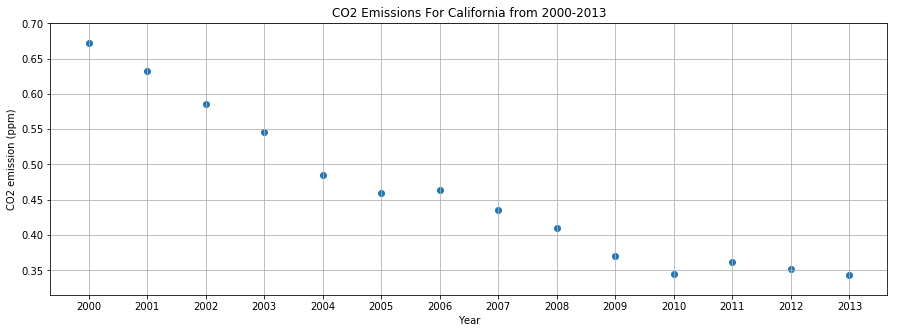

In [25]:
fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("CO2 emission (ppm)")
plt.title("CO2 Emissions For California from 2000-2013")
plt.grid(True)


plt.scatter(cali["Year"],cali["C02 emmision (ppm)"])

# Save the figure
plt.savefig("output_data/cali_co2.png")


In [26]:
print("It appears that California has been doing there part to reduce it's greenhouse emissions")

It appears that California has been doing there part to reduce it's greenhouse emissions


In [27]:
# us_states_df['State'].value_counts()

# # for state in States:
# #     if state = state


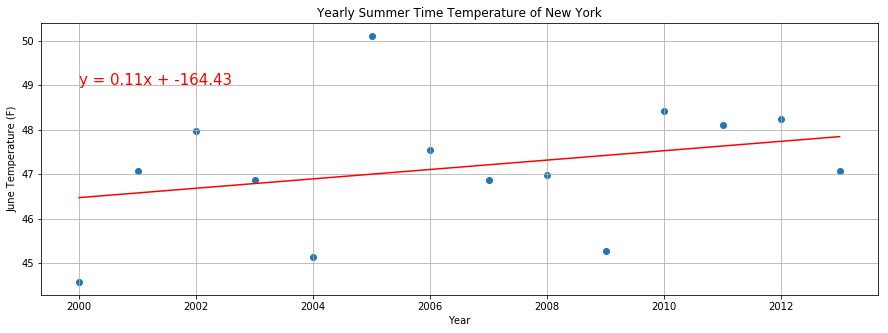

In [40]:
#temp of New York in June
#Get data for New York

x_values = ny["Year"].astype('int64')
y_values = ny["AverageTemperature"]

fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("June Temperature (F)")
plt.title("Yearly Summer Time Temperature of New York")
plt.scatter(x_values,y_values)
#plt.subplot(1,2,2)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.grid(True)


linregress(x_values,regress_values)
plt.plot(x_values, intercept + slope*x_values, 'r', label='fitted line')
plt.annotate(line_eq,(2000,49),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/ny_temp.png")


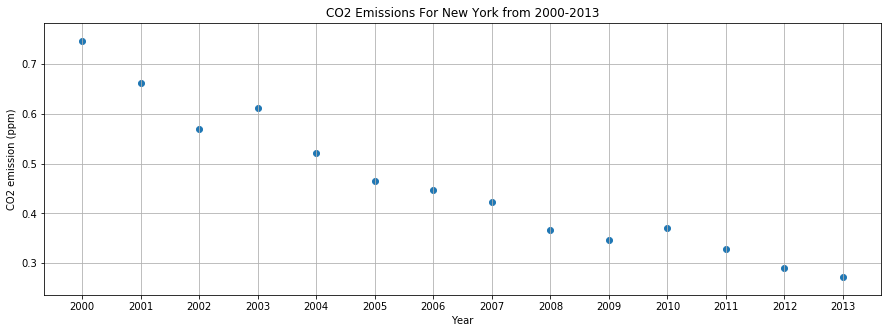

In [29]:
#cO2 emissions of NY from 2000-2013

fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("CO2 emission (ppm)")
plt.title("CO2 Emissions For New York from 2000-2013")
plt.grid(True)


plt.scatter(ny["Year"],ny["C02 emmision (ppm)"])

# Save the figure
plt.savefig("output_data/ny_co2.png")

In [32]:
# hawaii = co2_temp_clean.loc[co2_temp_clean["State"]=="Hawaii"]

# #x_values2 = cali["Year"].astype('int64')
# y_values4 = hawaii["AverageTemperature"]

# fig= plt.figure(figsize=(15,5))
# plt.xlabel("Year")
# plt.ylabel("June Temperature (F)")


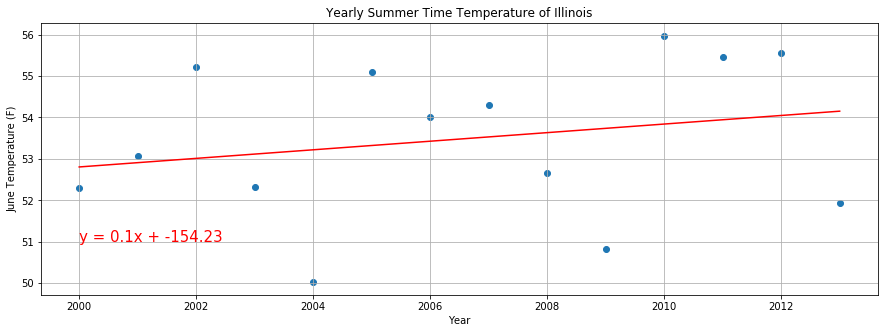

In [36]:
#Data for Illinois

x_values3 = ill["Year"].astype('int64')
y_values3 = ill["AverageTemperature"]

fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("June Temperature (F)")
plt.title("Yearly Summer Time Temperature of Illinois")
plt.scatter(x_values3,y_values3)
plt.grid(True)
#plt.subplot(1,2,2)


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values3, y_values3)
regress_values = x_values3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


linregress(x_values3,regress_values)
plt.plot(x_values3, intercept + slope*x_values3, 'r', label='fitted line')
plt.annotate(line_eq,(2000,51),fontsize=15,color="red")

# Save the figure
plt.savefig("output_data/illinois_temp.png")


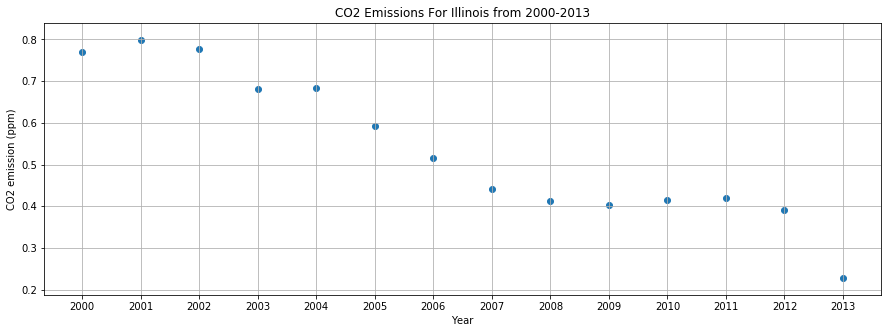

In [37]:
fig= plt.figure(figsize=(15,5))
plt.xlabel("Year")
plt.ylabel("CO2 emission (ppm)")
plt.title("CO2 Emissions For Illinois from 2000-2013")
plt.grid(True)


plt.scatter(ill["Year"],ill["C02 emmision (ppm)"])
# Save the figure
plt.savefig("output_data/illinois_co2.png")